# Dataset #1 Preprocessing and Exploration

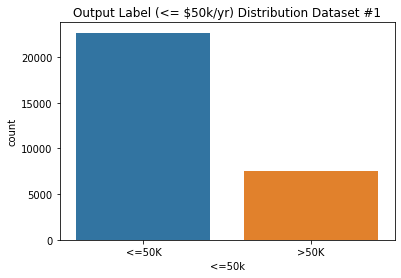

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import seaborn as sns

ds1 = pd.read_csv('./data/adult.data',
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                           'native-country', '<=50k'])
ds1.dropna()
ds1.drop_duplicates()
ds1 = ds1[ds1['workclass'] != '?']
ds1 = ds1[ds1['occupation'] != '?']
ds1 = ds1[ds1['education'] != '?']
ds1 = ds1[ds1['marital-status'] != '?']
ds1 = ds1[ds1['relationship'] != '?']
ds1 = ds1[ds1['race'] != '?']
ds1 = ds1[ds1['sex'] != '?']
ds1 = ds1[ds1['native-country'] != '?']

ax = sns.countplot(x="<=50k", data=ds1).set_title("Output Label (<= $50k/yr) Distribution Dataset #1")

Text(0.5, 1.0, 'Correlation Matrix')

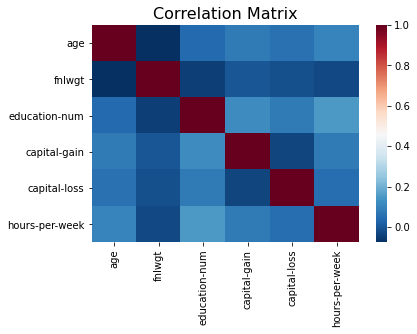

In [10]:
sns.heatmap(ds1.select_dtypes(exclude="object").corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)

In [11]:
ds1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
<=50k             object
dtype: object

In [12]:
ds1_dummies = pd.get_dummies(ds1, columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
ds1_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', '<=50k', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=105)

In [13]:
ds1_dummies.dropna()
ds1_dummies['<=50k'].value_counts()
ds1_dummies['<=50k'] = ds1_dummies['<=50k'].map({'<=50K':1, '>50K': 0})
ds1_labels = ds1_dummies['<=50k']
ds1_dummies = ds1_dummies.drop(['<=50k'], axis=1)
ds1_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=104)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds1_dummies, ds1_labels, test_size=0.20, stratify=ds1_labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  24129
number of test samples:  6033


In [24]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
pipe_steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None))]

check_params = {'knn__n_neighbors':np.arange(5,8,2), 
                'knn__weights': ['uniform', 'distance']}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])


In [25]:
from tqdm import tqdm_notebook as tqdm
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm([3,6,9]):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv, n_jobs=6)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %5.4f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)
    

print ("out o' the loop")
#score for 3 fold CV := 0.8263
#!!!! best fit parameters from GridSearchCV !!!!
#{'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
#score for 6 fold CV := 0.8263
#!!!! best fit parameters from GridSearchCV !!!!
#{'knn__n_neighbors': 15, 'knn__weights': 'uniform'}
#score for 9 fold CV := 0.8263
#!!!! best fit parameters from GridSearchCV !!!!
#{'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

start fitting the data


score for 3 fold CV := 0.8207
!!!! best fit parameters from GridSearchCV !!!!
{'knn__n_neighbors': 7, 'knn__weights': 'uniform'}



KeyboardInterrupt: 

In [29]:
%%time
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
DecsTree = KNeighborsClassifier(n_neighbors=9,weights='uniform')
DecsTree.fit(X_train, y_train)


y_pred_train = DecsTree.predict(X_train)
y_pred_test = DecsTree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('training data confusion matrix')
print(conf_matrix_train)
print('testing data confusion matrix')
print(conf_matrix_test)

print('training accuracy rate: {}'.format(accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))

print('training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('training matthews_corrcoef Score: {}'.format(matthews_corrcoef(y_train, y_pred_train)))
print('test matthews_corrcoef score: {}'.format(matthews_corrcoef(y_test, y_pred_test)))

training data confusion matrix
      0      1
0  1931   4075
1   556  17567
testing data confusion matrix
     0     1
0  391  1111
1  213  4318
training accuracy rate: 0.808073272825231
test accuracy rate: 0.7805403613459307
training error rate: 0.191926727174769
test error rate: 0.21945963865406926
training matthews_corrcoef Score: 0.41358441730730133
test matthews_corrcoef score: 0.3073017216947902
CPU times: user 2.69 s, sys: 71 ms, total: 2.76 s
Wall time: 2.79 s


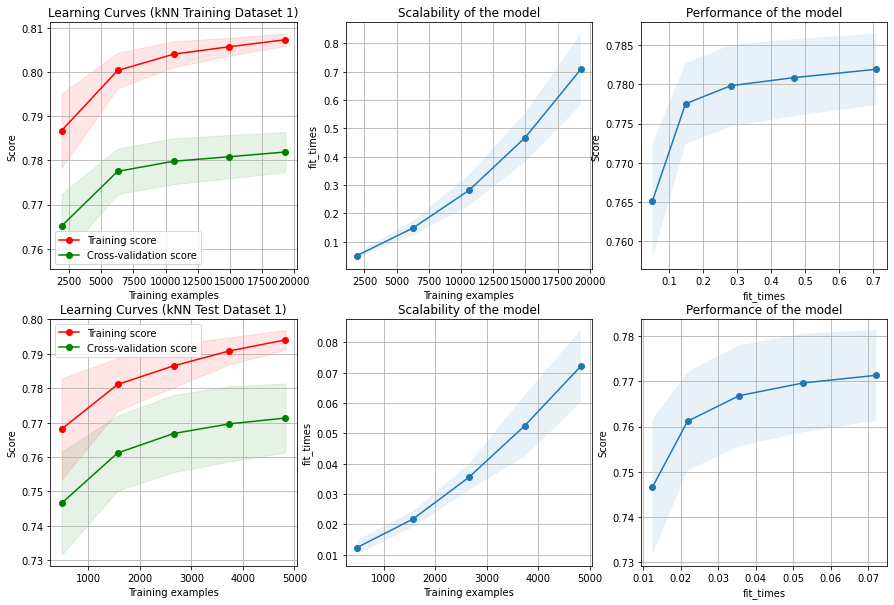

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (kNN Training Dataset 1)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=9,weights='uniform')

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (kNN Test Dataset 1)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])



plt.show()



In [30]:
ds2 = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
ds2.dropna()
ds2.drop_duplicates()
ds2_dummies = pd.get_dummies(ds2, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
ds2_dummies.dropna()
ds2_dummies['y'].value_counts()
ds2_dummies['y'] = ds2_dummies['y'].map({'yes':1, 'no': 0})
ds2_labels = ds2_dummies['y']
ds2_dummies = ds2_dummies.drop(['y'], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(ds2_dummies, ds2_labels, test_size=0.20, stratify=ds2_labels)

In [35]:
import math
clfs = []
clfs1 = []
for x in np.arange(1,16):
    clf = KNeighborsClassifier( n_neighbors=x,weights='uniform')
    clf.fit(X_train, y_train)
    clfs.append(clf)
    clf = KNeighborsClassifier( n_neighbors=x,weights='uniform')
    clf.fit(X1_train, y1_train)
    clfs1.append(clf)

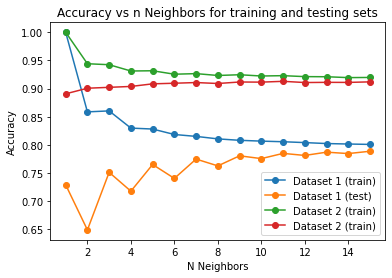

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
train_scores1 = [clf.score(X1_train, y1_train) for clf in clfs1]
test_scores1 = [clf.score(X1_test, y1_test) for clf in clfs1]
fig, ax = plt.subplots()
ax.set_xlabel("N Neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs n Neighbors for training and testing sets")
ax.plot(np.arange(1,16), train_scores, marker='o', label="Dataset 1 (train)")
ax.plot(np.arange(1,16), test_scores, marker='o', label="Dataset 1 (test)")
ax.plot(np.arange(1,16), train_scores1, marker='o', label="Dataset 2 (train)")
ax.plot(np.arange(1,16), test_scores1, marker='o', label="Dataset 2 (train)")
ax.legend()
plt.show()